In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
csv_files = list(Path("../../erdos-private/experiments/waymo/timely-map/ground_truth_map/").glob("**/*.csv"))

In [3]:
def to_dict(csv_file):
    return {"path": str(csv_file), "runtime": int(csv_file.stem), "scenario": (csv_file.parent.parent.stem+"-"+csv_file.parent.stem)}
content_df = pd.DataFrame([to_dict(csv_file) for csv_file in csv_files])

In [4]:
content_df

path  runtime  \
0     ../../erdos-private/experiments/waymo/timely-m...      600   
1     ../../erdos-private/experiments/waymo/timely-m...      900   
2     ../../erdos-private/experiments/waymo/timely-m...        0   
3     ../../erdos-private/experiments/waymo/timely-m...      100   
4     ../../erdos-private/experiments/waymo/timely-m...      700   
...                                                 ...      ...   
1623  ../../erdos-private/experiments/waymo/timely-m...     1000   
1624  ../../erdos-private/experiments/waymo/timely-m...      400   
1625  ../../erdos-private/experiments/waymo/timely-m...      500   
1626  ../../erdos-private/experiments/waymo/timely-m...      800   
1627  ../../erdos-private/experiments/waymo/timely-m...      300   

                scenario  
0     training_0000-S_17  
1     training_0000-S_17  
2     training_0000-S_17  
3     training_0000-S_17  
4     training_0000-S_17  
...                  ...  
1623  training_0004-S_23  
1624  training_0004-S_23  
1625  training_0004-S_23  
1626  training_0004-S_23  
1627  training_0004-S_23  

[1628 rows x 3 columns]

In [15]:
def plot(scenario, accuracy="coco_AP_IoU=0.50:0.95_area=all_maxDets=100"):
    csv_file_1 = content_df.loc[(content_df["scenario"] == scenario) & (content_df["runtime"] == 100)]["path"].to_list()[0]
    csv_file_3 = content_df.loc[(content_df["scenario"] == scenario) & (content_df["runtime"] == 300)]["path"].to_list()[0]
    csv_file_5 = content_df.loc[(content_df["scenario"] == scenario) & (content_df["runtime"] == 500)]["path"].to_list()[0]
    csv_file_7 = content_df.loc[(content_df["scenario"] == scenario) & (content_df["runtime"] == 700)]["path"].to_list()[0]
    csv_file_10 = content_df.loc[(content_df["scenario"] == scenario) & (content_df["runtime"] == 1000)]["path"].to_list()[0]

    def ts_mAP(csv_file, accuracy):
        df = pd.read_csv(csv_file)
        df = df.loc[df["extra_info"] == accuracy]
        ts = df["simulator_ts"]/1000.
        mAP = df["value"]
        return ts, mAP

    plt.title("Decay of {} with increasing runtime within a scenario ({})".format(accuracy, scenario))
    plt.ylabel("timely mAP")
    plt.xlabel("scenario time (s)")
    plt.plot(*ts_mAP(csv_file_1, accuracy), label="100")
    plt.plot(*ts_mAP(csv_file_3, accuracy), label="300")
    plt.plot(*ts_mAP(csv_file_5, accuracy), label="500")
    plt.plot(*ts_mAP(csv_file_7, accuracy), label="700")
    #plt.plot(*ts_mAP(csv_file_10, accuracy), label="1000")
    plt.legend()

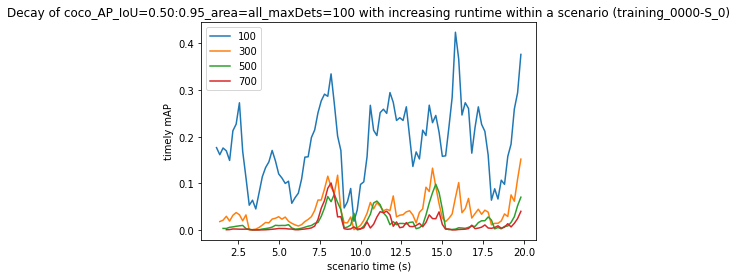

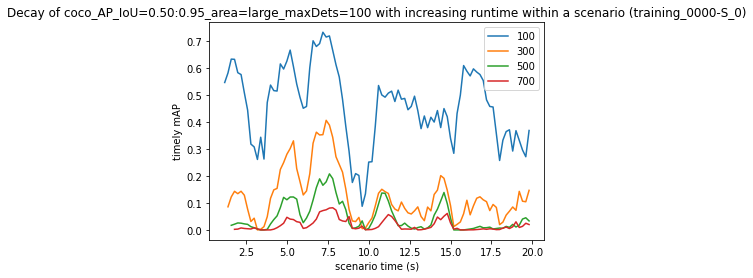

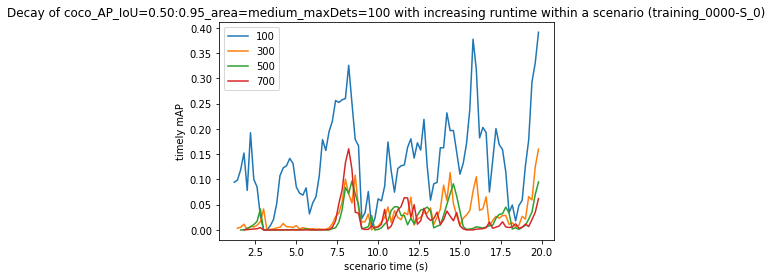

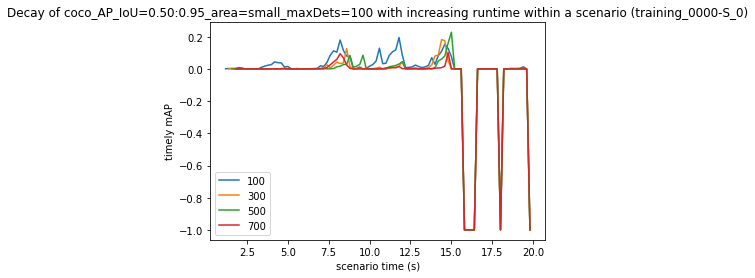

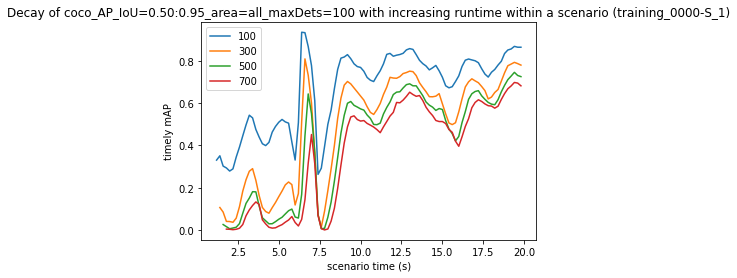

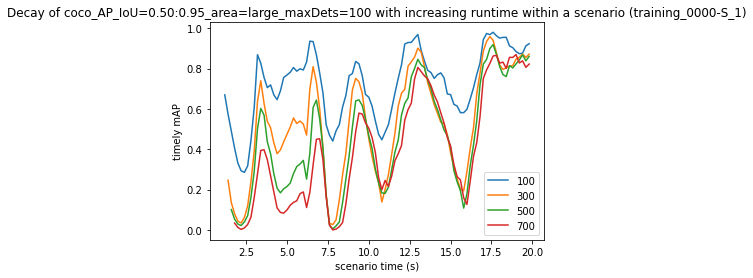

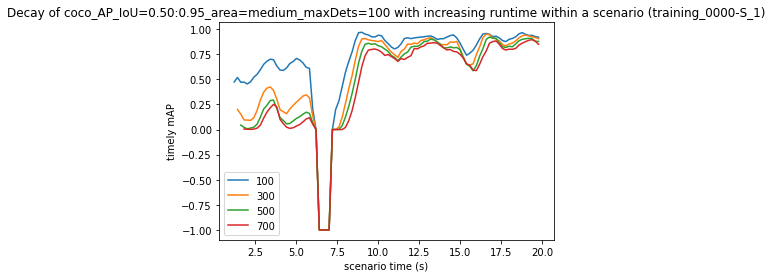

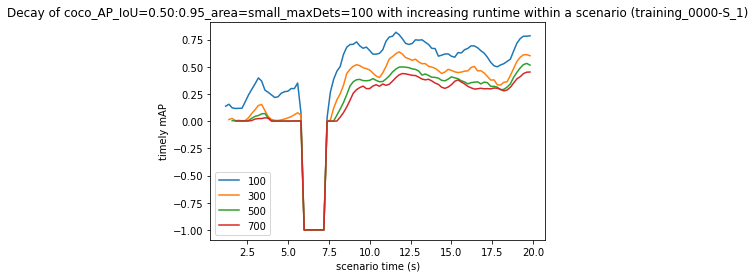

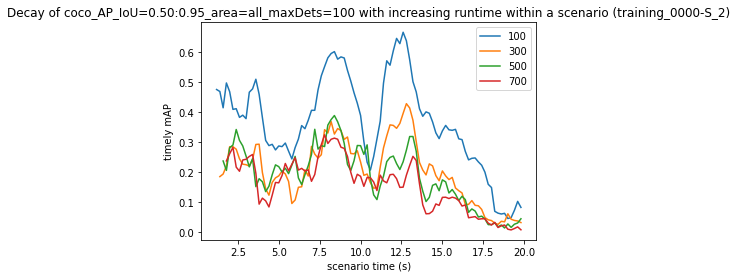

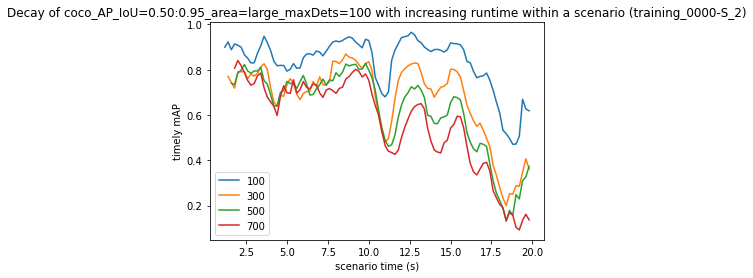

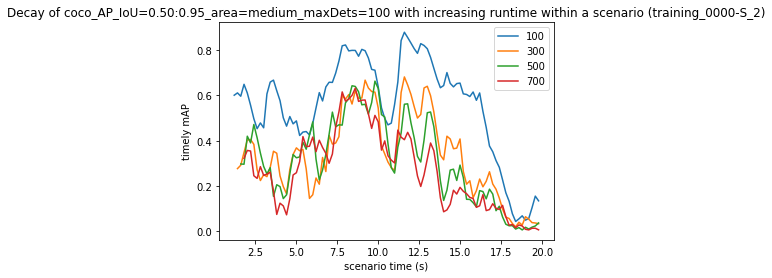

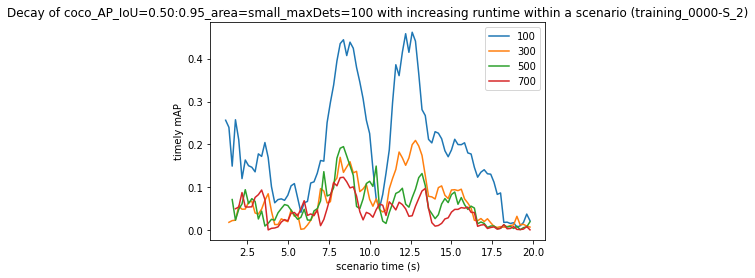

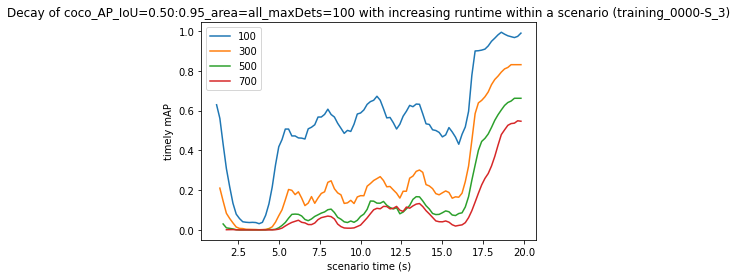

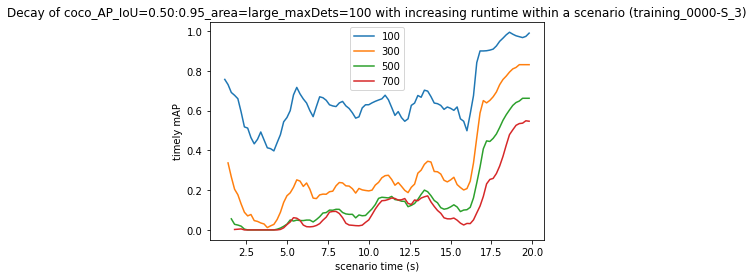

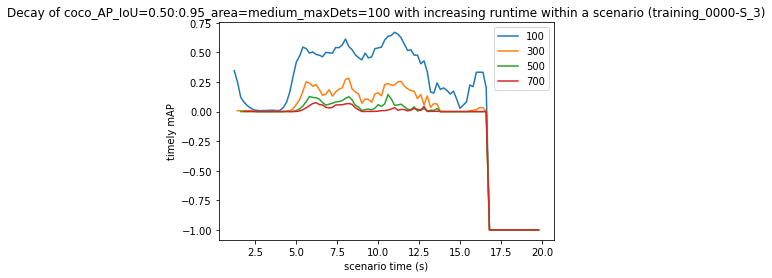

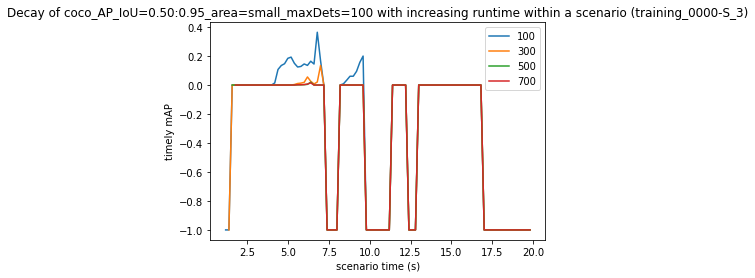

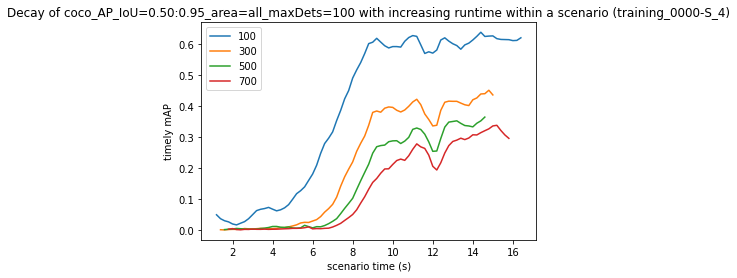

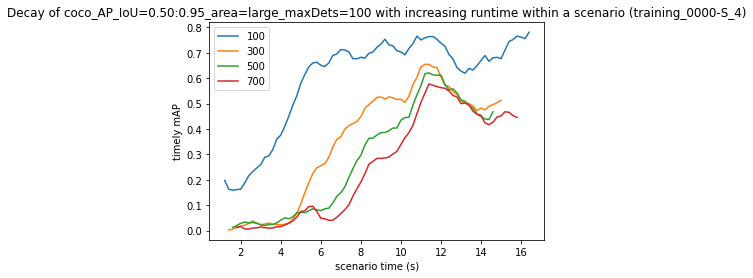

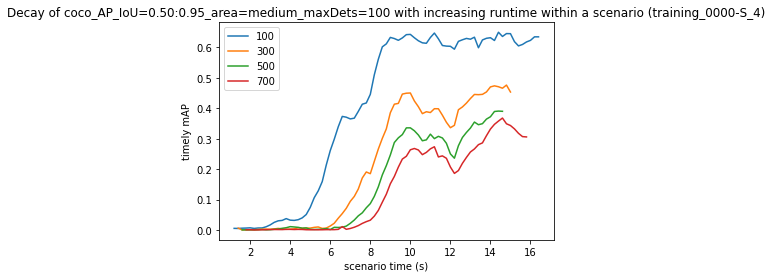

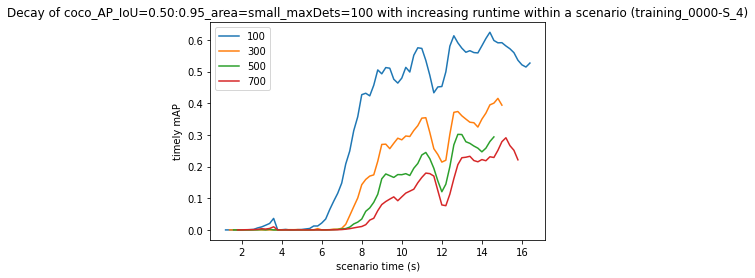

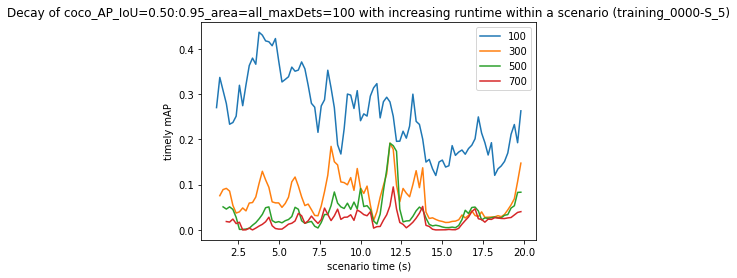

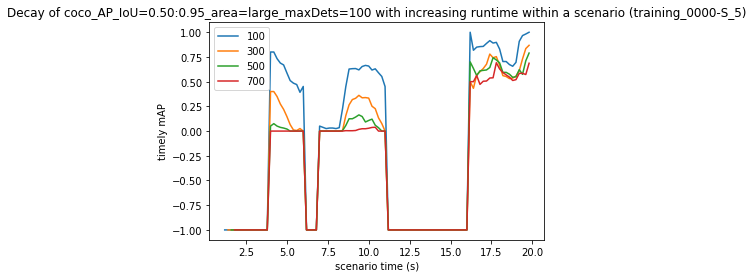

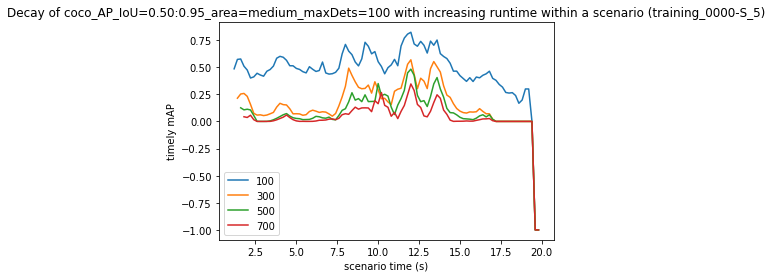

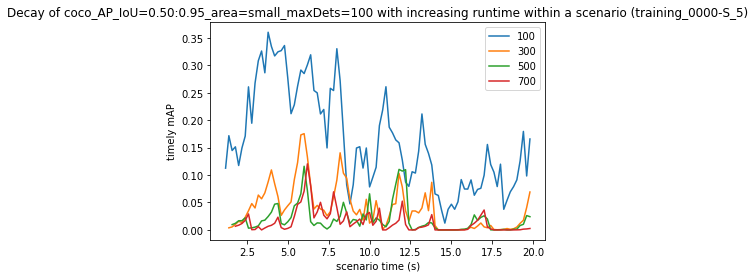

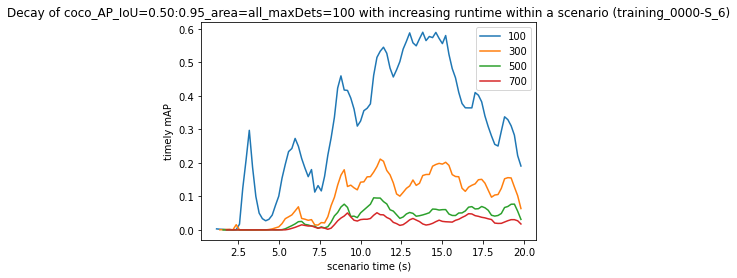

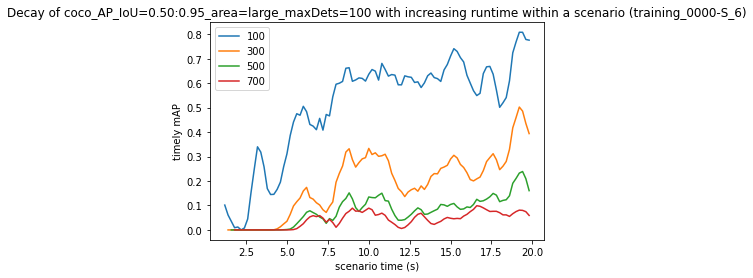

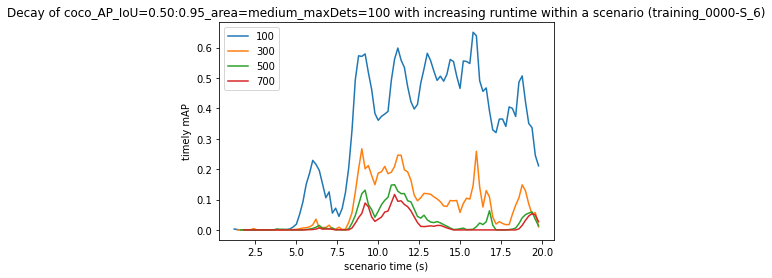

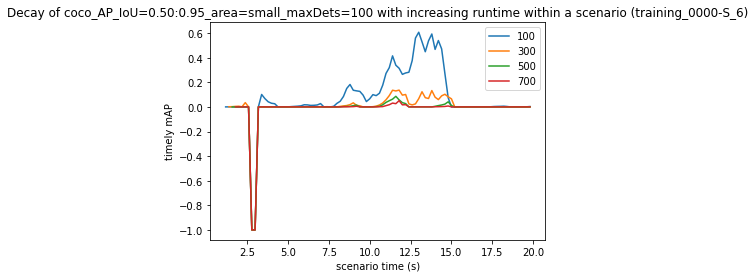

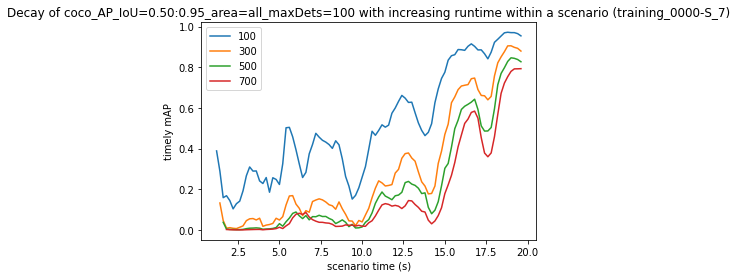

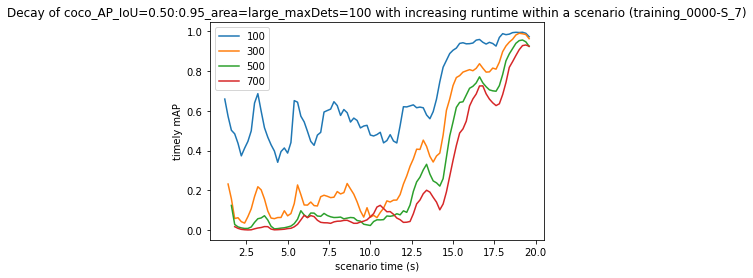

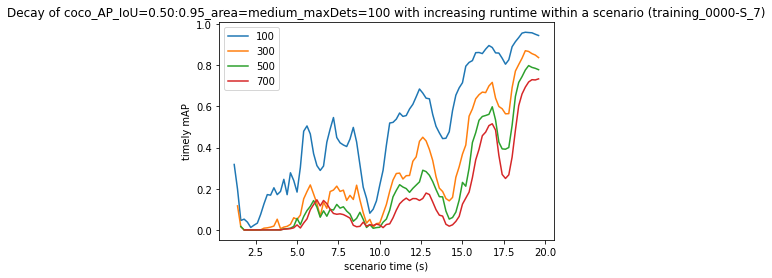

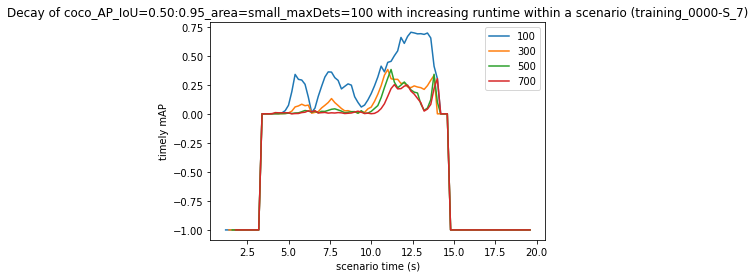

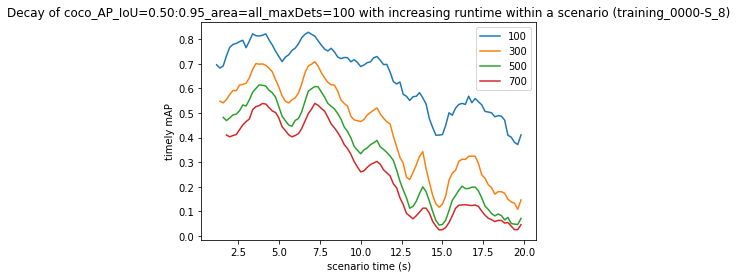

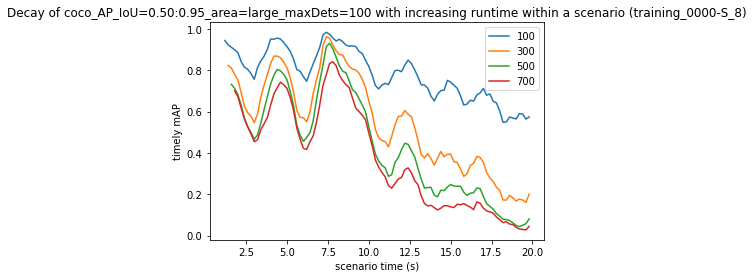

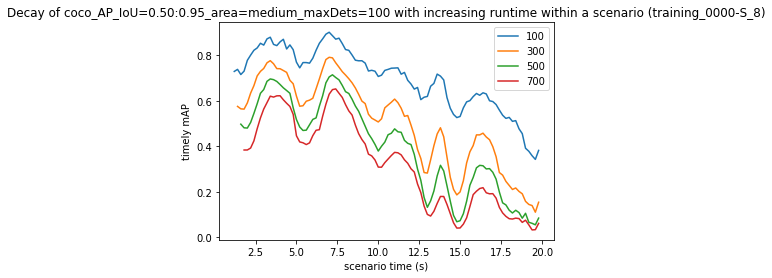

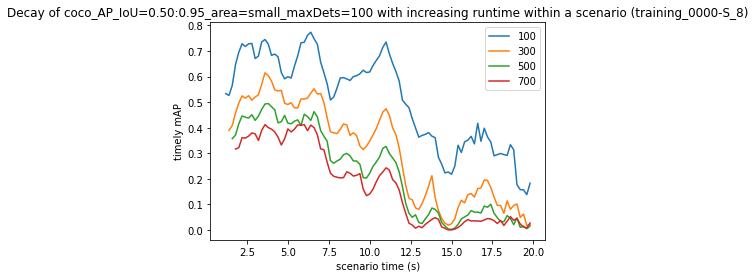

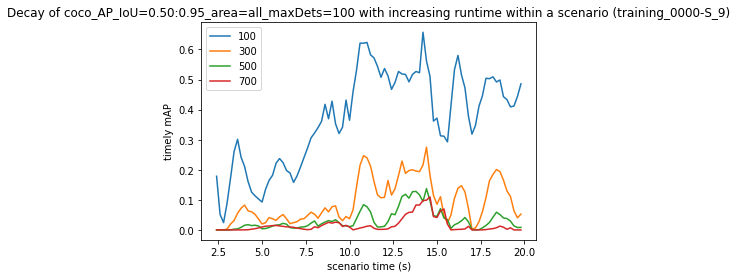

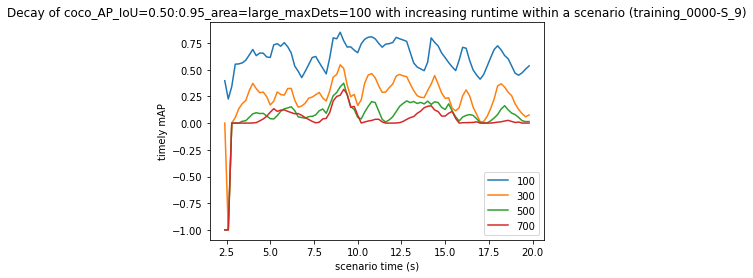

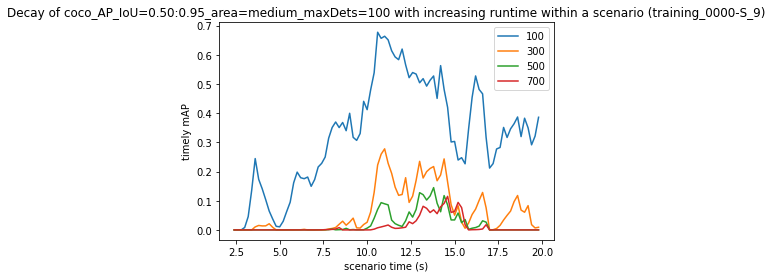

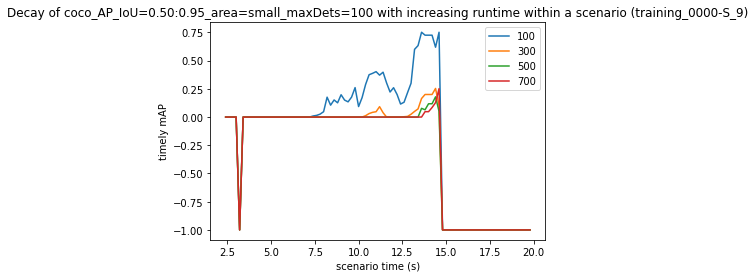

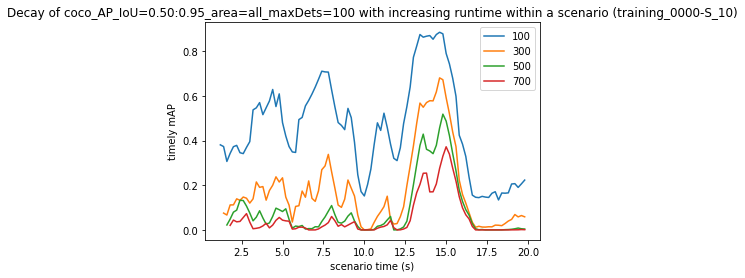

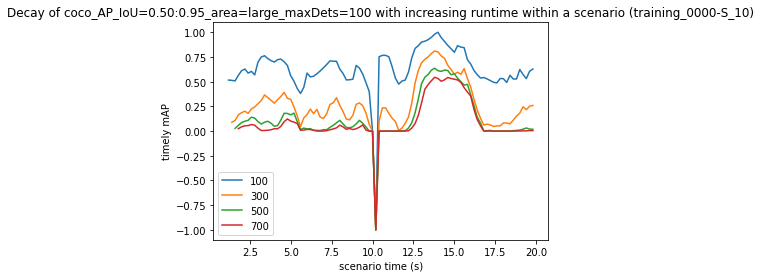

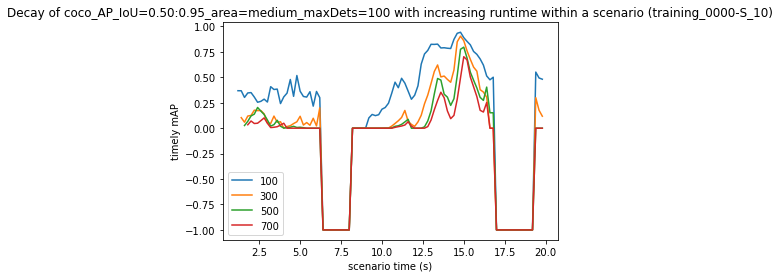

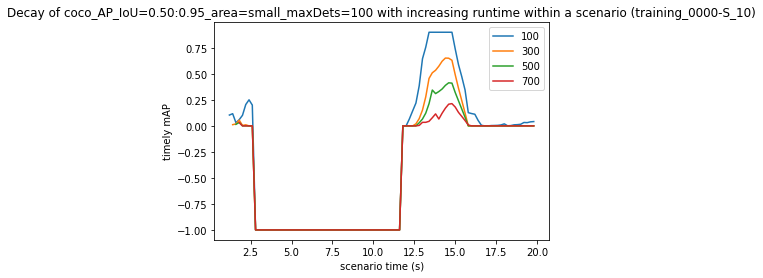

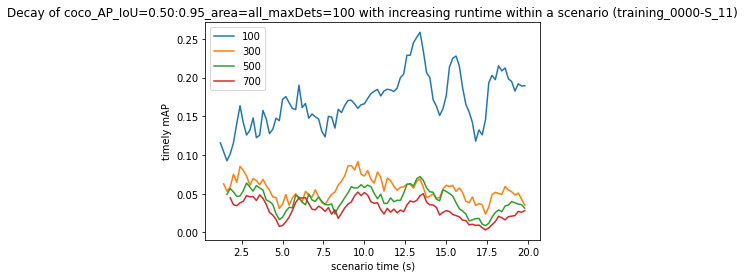

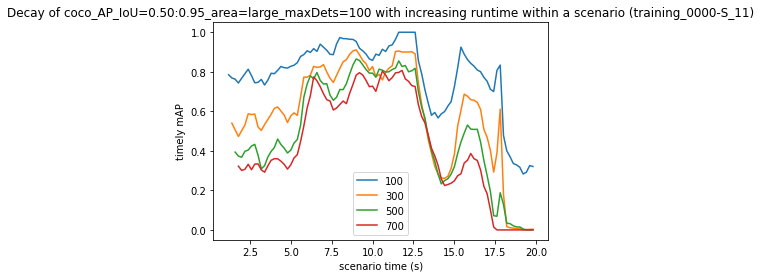

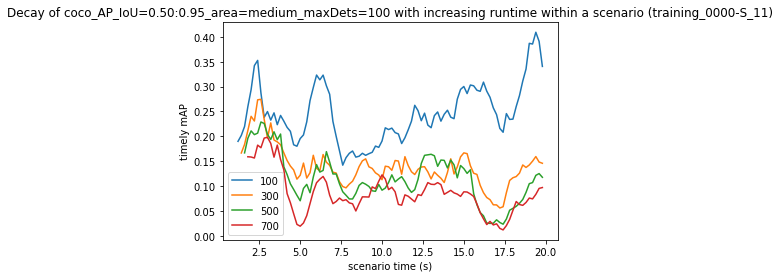

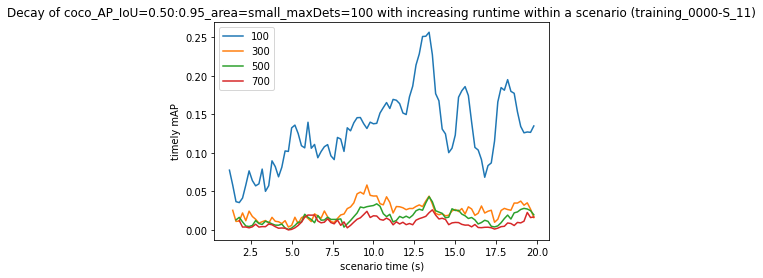

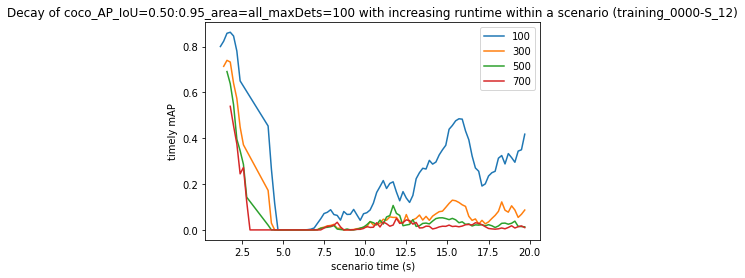

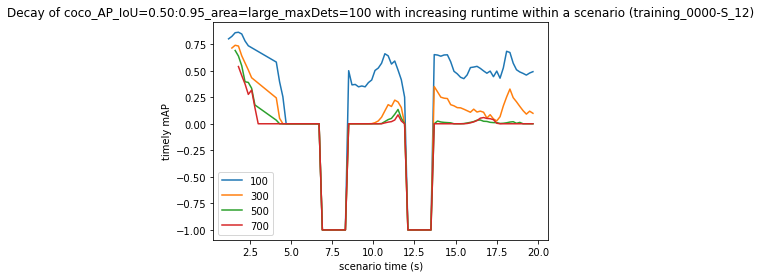

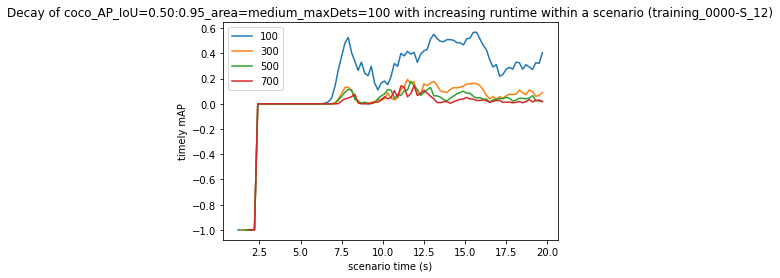

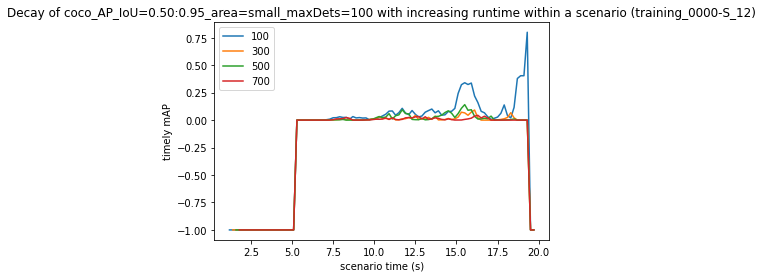

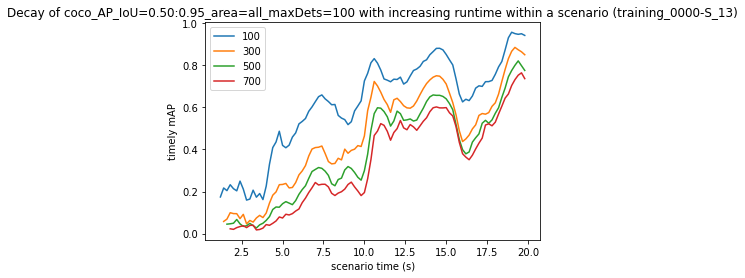

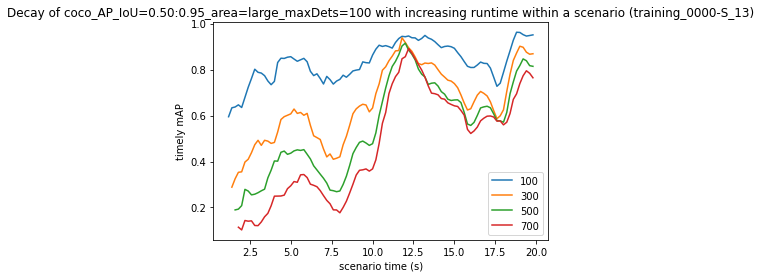

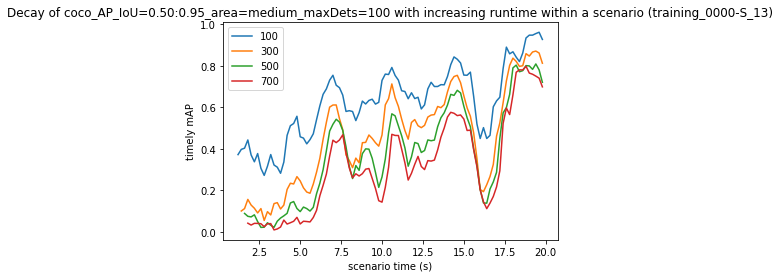

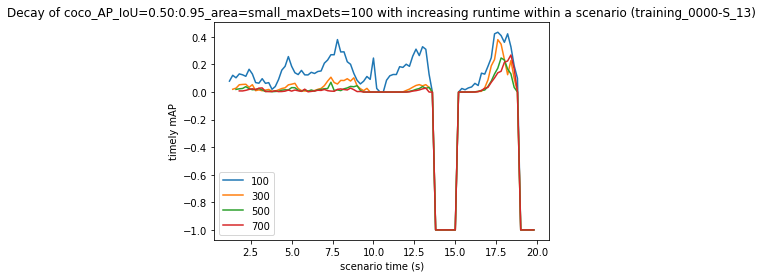

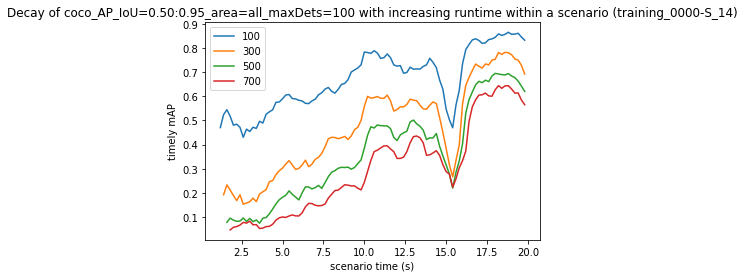

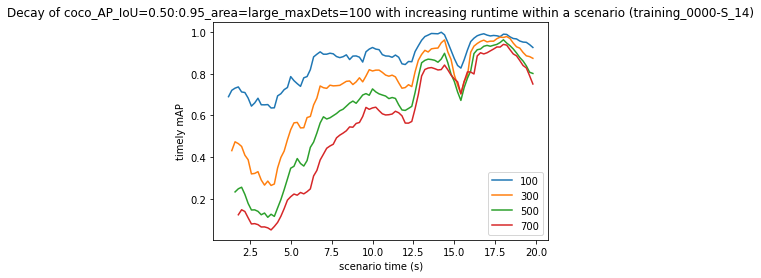

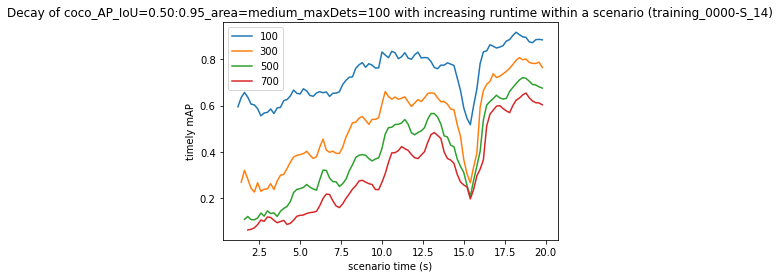

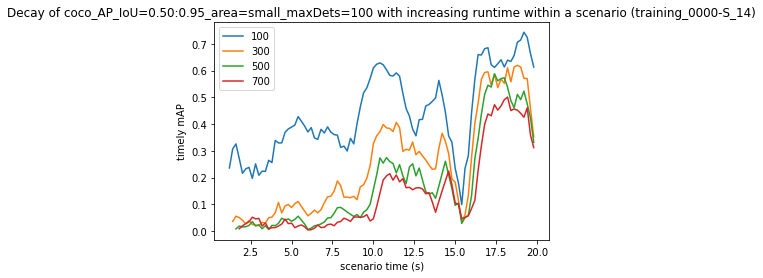

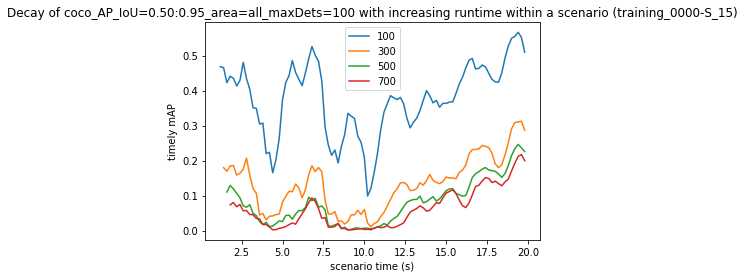

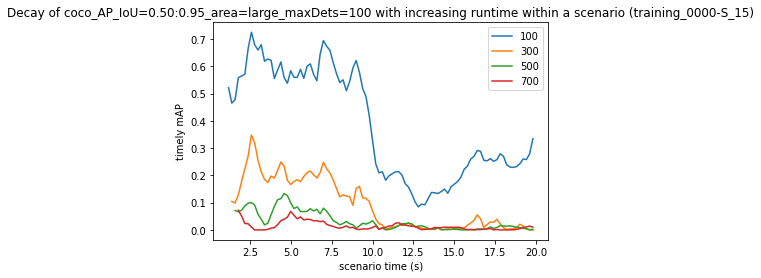

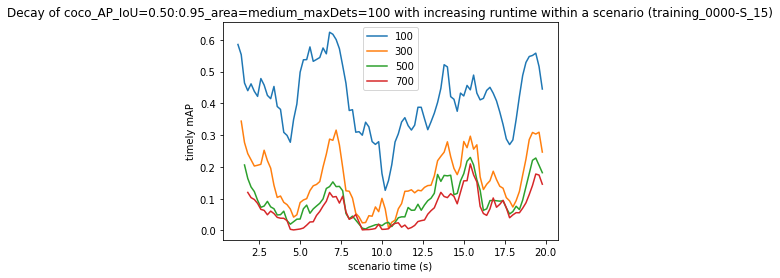

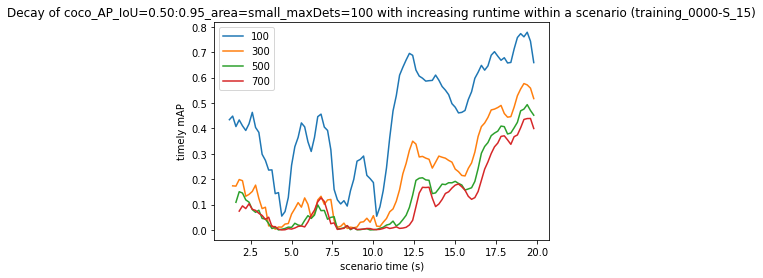

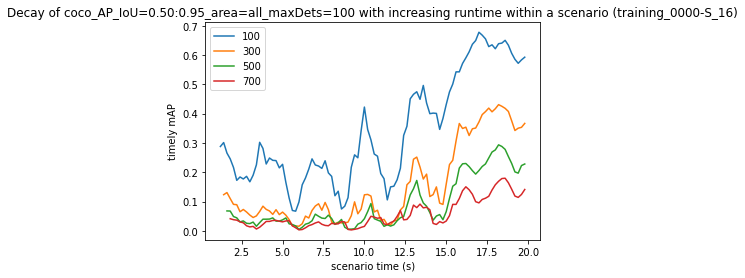

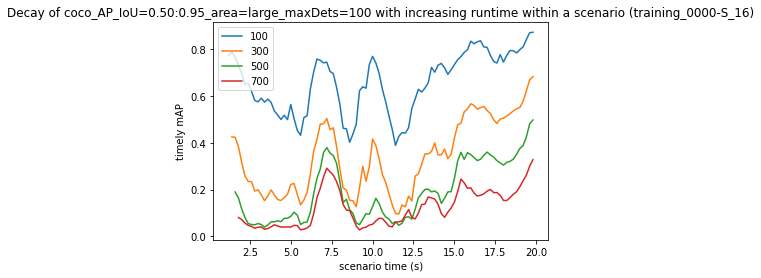

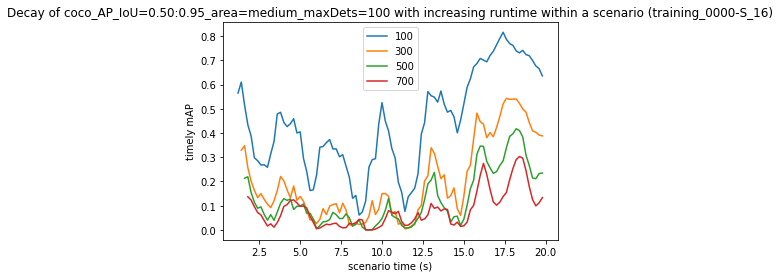

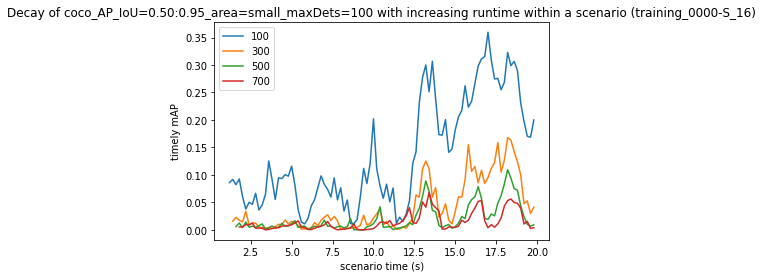

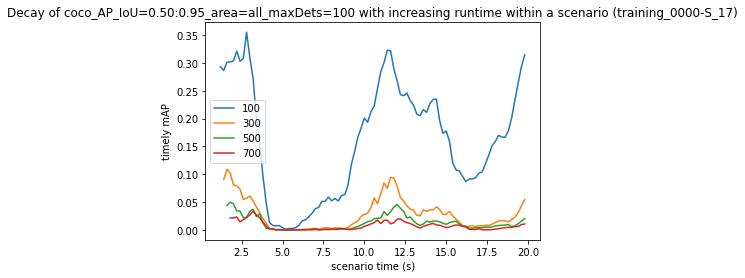

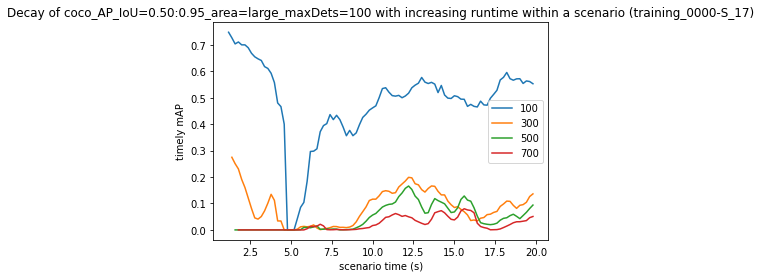

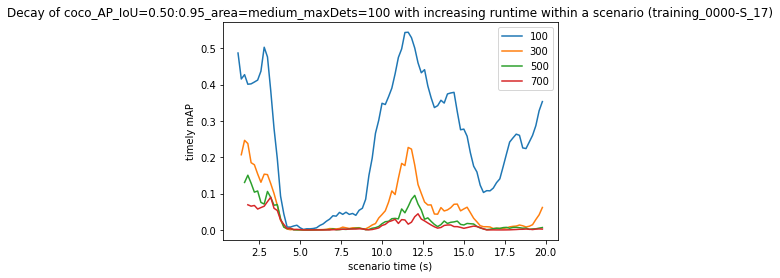

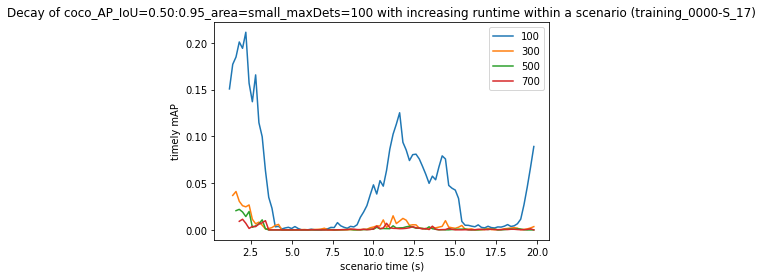

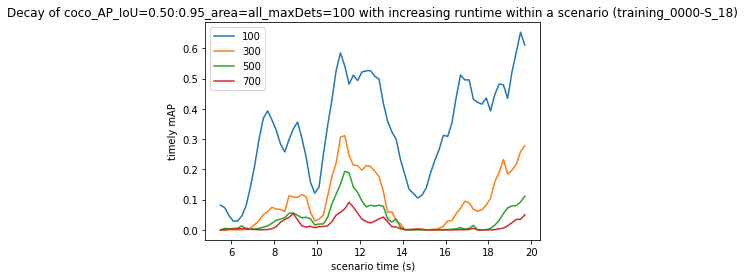

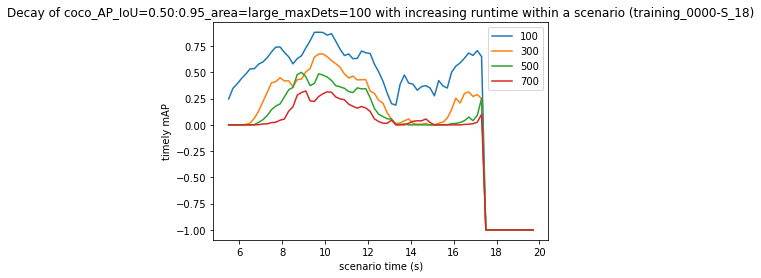

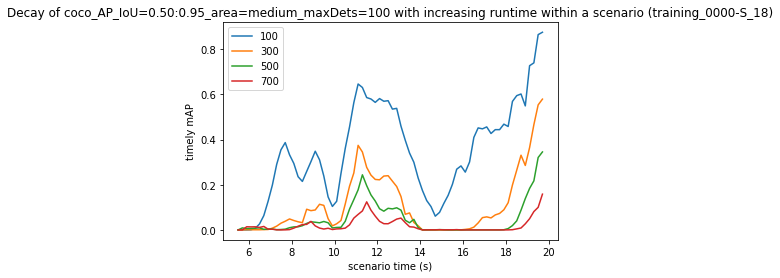

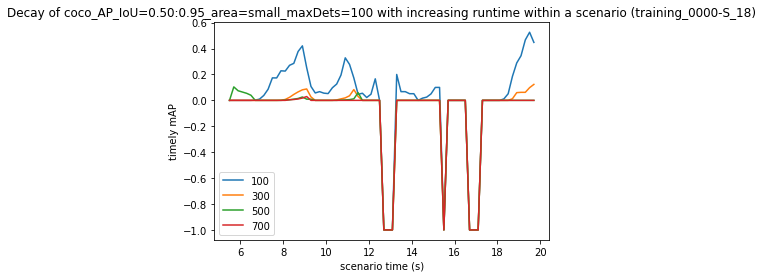

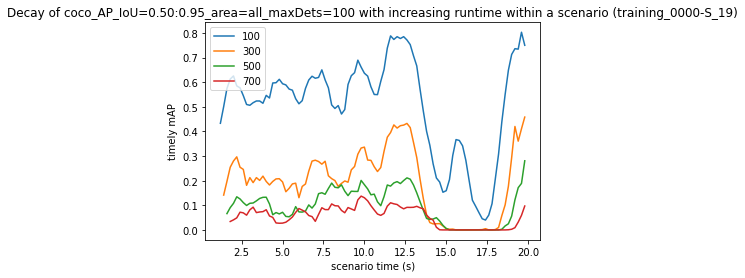

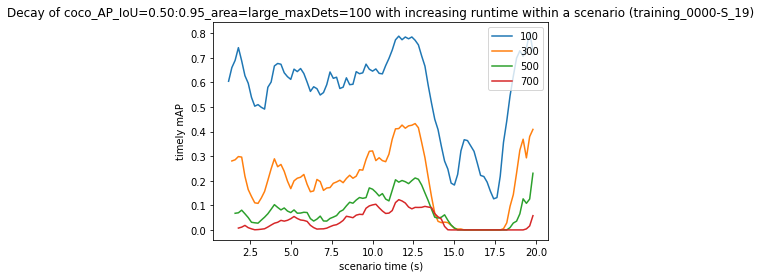

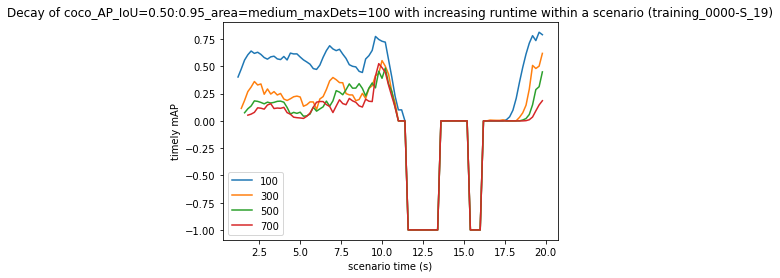

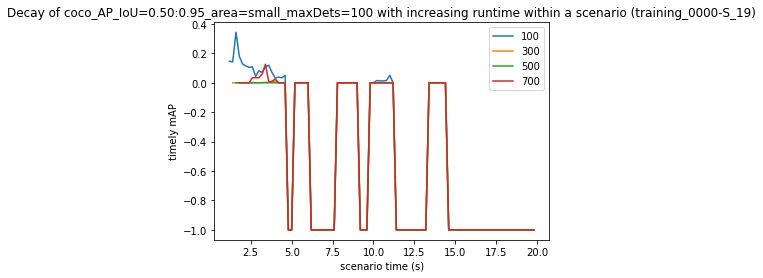

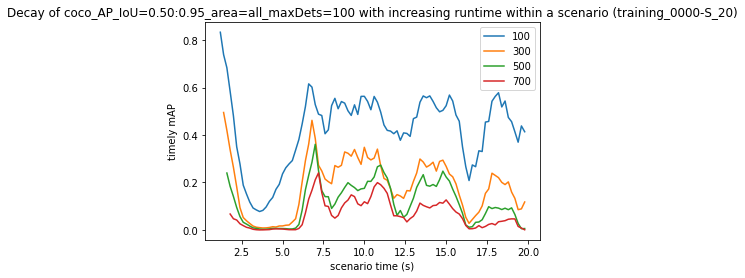

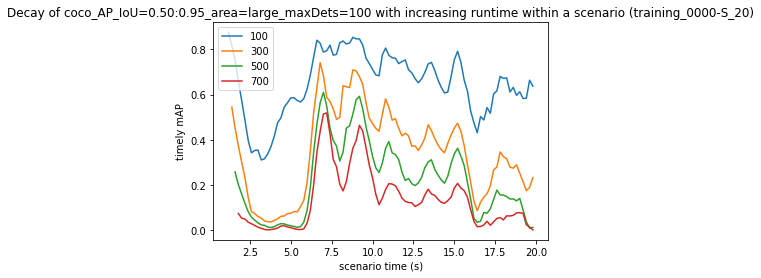

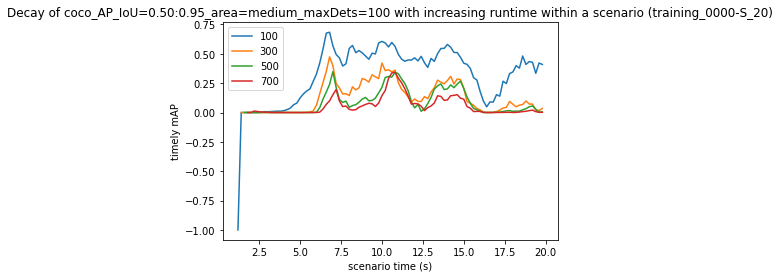

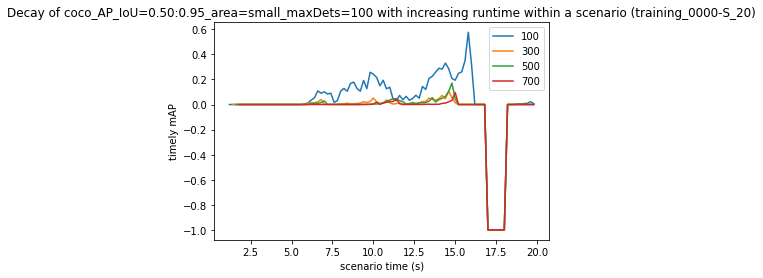

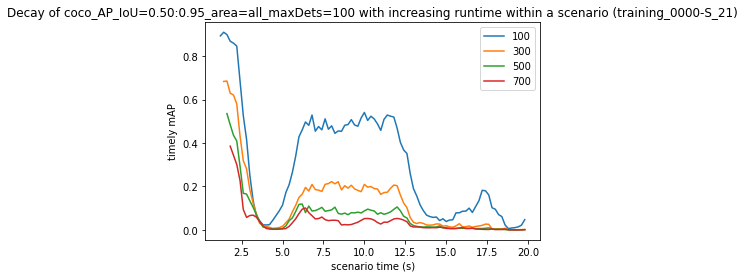

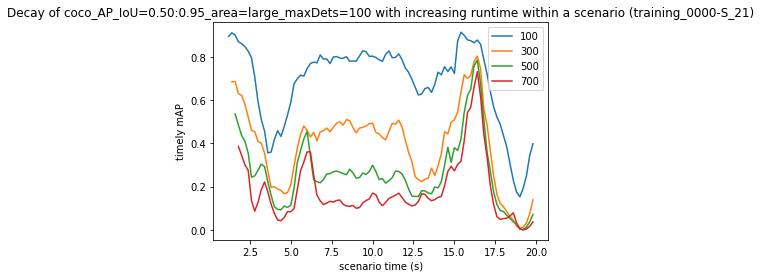

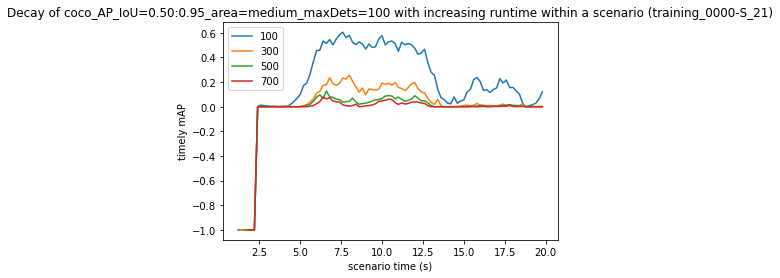

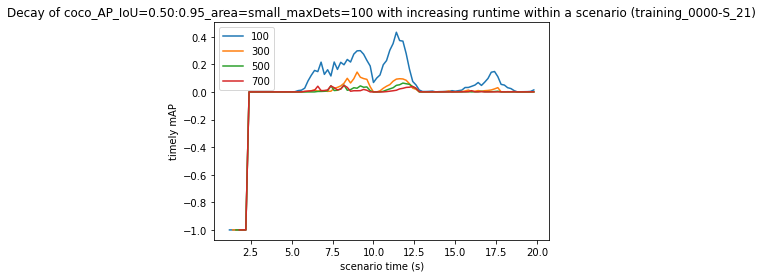

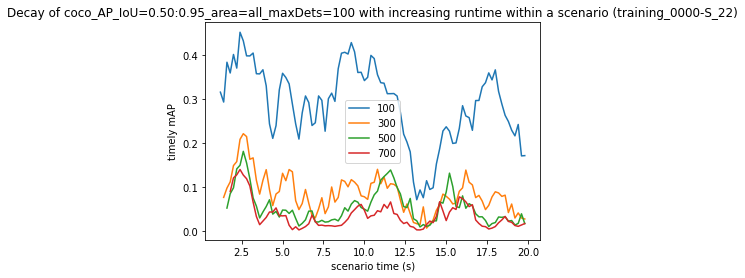

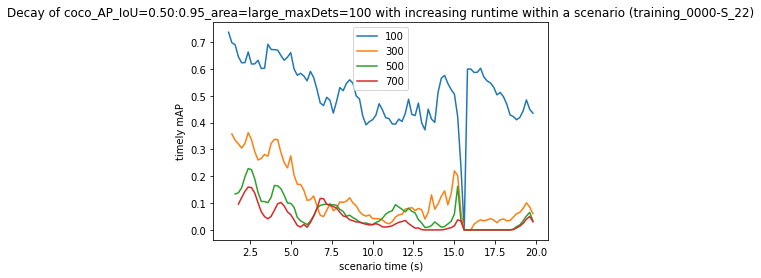

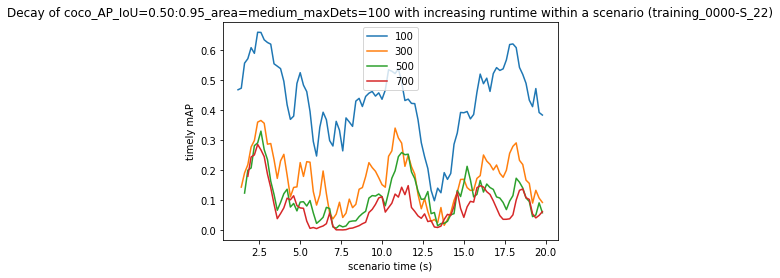

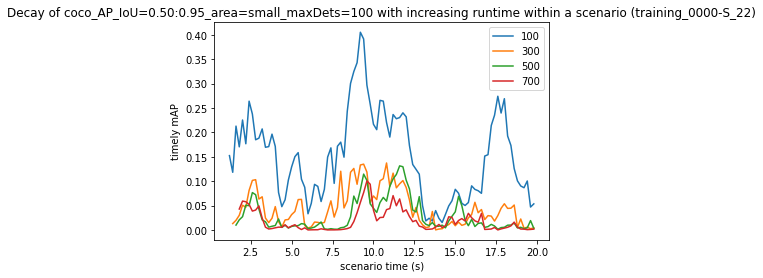

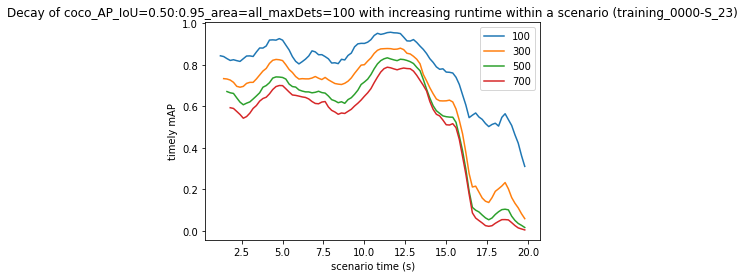

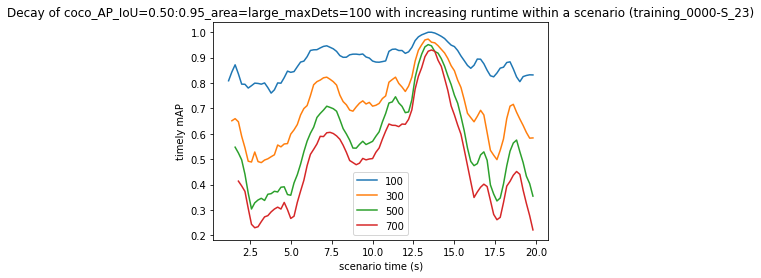

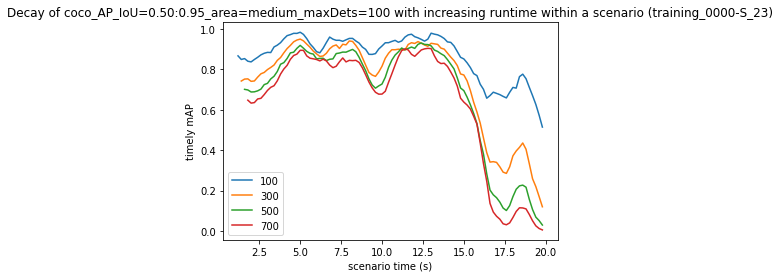

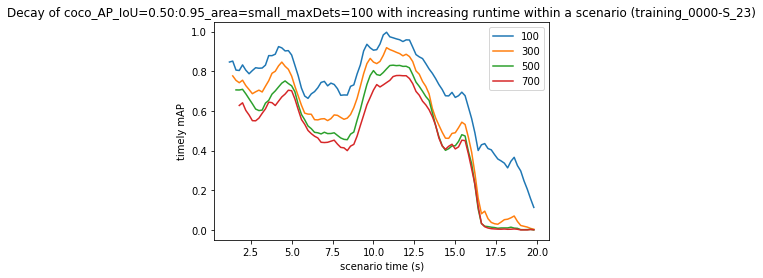

In [16]:
for i in range(24):
    plot("training_0000-S_{}".format(i), "coco_AP_IoU=0.50:0.95_area=all_maxDets=100")
    plt.show()
    plot("training_0000-S_{}".format(i), "coco_AP_IoU=0.50:0.95_area=large_maxDets=100")
    plt.show()
    plot("training_0000-S_{}".format(i), "coco_AP_IoU=0.50:0.95_area=medium_maxDets=100")
    plt.show()
    plot("training_0000-S_{}".format(i), "coco_AP_IoU=0.50:0.95_area=small_maxDets=100")
    plt.show()